In [6]:
import numpy as np

x = np.array([1,2,3])
# print(x)
# print(np.diag(x))

M = np.random.normal(0,1,(2,3))
N = np.random.normal(0,1,(3,4))
print(np.matmul(M,N).round(3)) # result => (2,3)
print((M @ N).round(3))

[[ 0.389  0.778 -1.755  0.557]
 [-0.021 -0.459  0.679 -0.242]]
[[ 0.389  0.778 -1.755  0.557]
 [-0.021 -0.459  0.679 -0.242]]


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(0)
plt.style.use('seaborn')

# set params
N, n_feature = 300, 5 # 2000개의 row
lr = 0.03
epochs = 30
b_size = 32 # batch size ==> 32개 만큼 번갈아가면서 가져옴 

t_W = np.random.uniform(-1,1,(n_feature,1)) # 컬럼으로 만들기
t_b = np.random.uniform(-1,1,(1,1))
W = np.random.uniform(-1,1,(n_feature,1)) # 학습이 필요한 initial weight
b = np.random.uniform(-1,1,(1,1))

n_batch = N // b_size # b_idx를 위해 몫만 가져오기 

# generate dataset
x_data = np.random.randn(N, n_feature) # tensorflow에서는 기본적으로 이미 transpose된 형태로 이용됨. 
y_data = x_data @ t_W + t_b  # (32, 1)

J_track = list()
W_track, b_track = list(), list()
for epoch in range(epochs):
    for b_idx in range(n_batch):
        W_track.append(W)
        b_track.append(b)

        # get minibatch
        X = x_data[b_idx*b_size : (b_idx+1)*b_size, ...]
        Y = y_data[b_idx*b_size : (b_idx+1)*b_size, ...]

        # forward propagation
        Pred = X @ W + b # prediction 구해주기
        J0 = (Y - Pred)**2
        J = np.mean(J0)
        J_track.append(J)

        # jacobians
        # 이론적으로 수학적으로 다룬 것 다 포함. 
        dJ_dJ0 = 1/N*np.ones((1,b_size)) # 미분했을 때 1/N을 가지는 벡터 행렬
        dJ0_dPred = np.diag(-2*(Y - Pred).flatten()) # flatten()을 사용하여 matrix --> vector 형태로 만듬
        dPred_dW = X
        dPred_dB = np.ones((b_size,1))

        # backpropagation
        dJ_dPred = dJ_dJ0 @ dJ0_dPred
        dJ_dW = dJ_dPred @ dPred_dW
        dJ_db = dJ_dPred @ dPred_dB


        # parmater update
        W = W - lr*dJ_dW.T
        b = b - lr*dJ_db

W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)
print(t_W.shape, W_track.shape)
print(t_b.shape, b_track.shape)

(5, 1) (5, 270)
(1, 1) (270, 1)


<ipython-input-35-90e0e86d8512>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<ipython-input-33-3fc39fb479e5>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', n_feature)


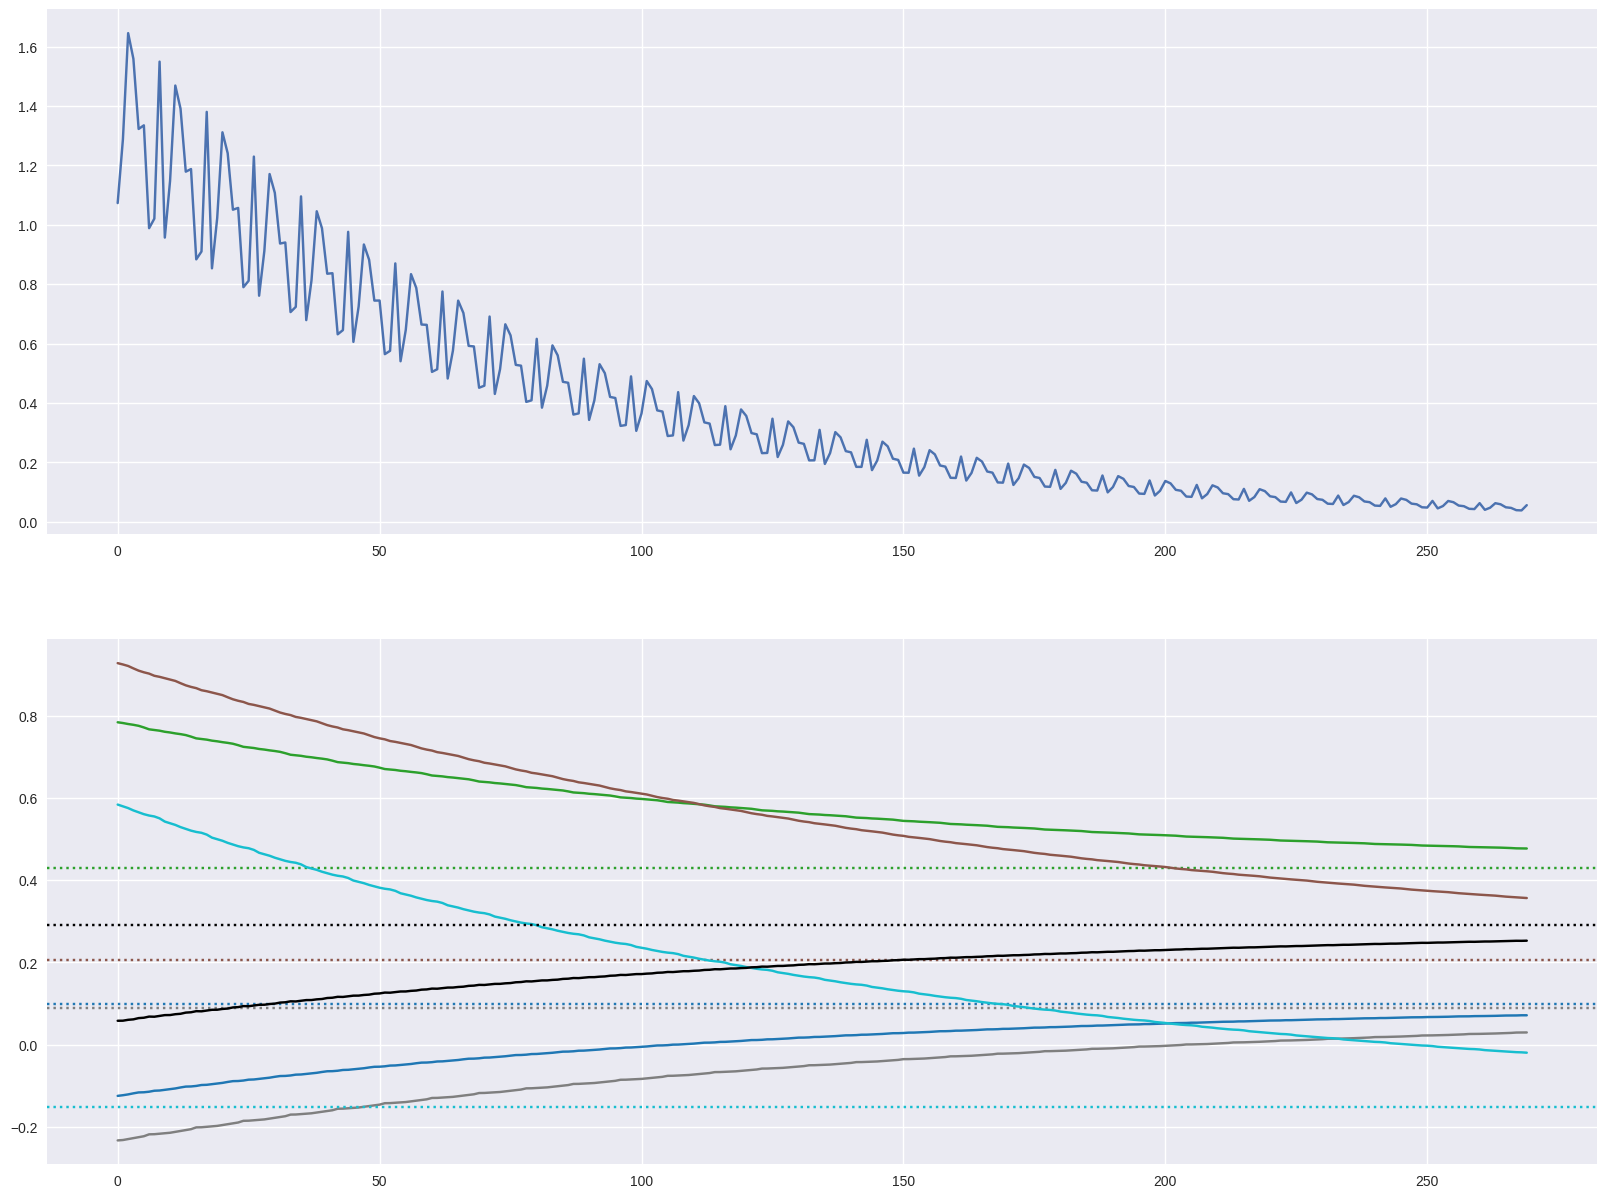

In [33]:
cmap = cm.get_cmap('tab10', n_feature)
fig, axes = plt.subplots(2,1,figsize=(20,15))
axes[0].plot(J_track)

for w_idx, (t_w, w_track) in enumerate(zip(t_W, W_track)):
    axes[1].axhline(y=t_w, linestyle=':', color=cmap(w_idx))
    axes[1].plot(w_track, color=cmap(w_idx))
axes[1].axhline(y=t_b, linestyle=':', color='black')
axes[1].plot(b_track, color='black')